<h1>Lukumäärä- ja prosentti-yhteenvedot</h1>

In [1]:
#Tuon tarvittavat kirjastot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Avaan datan
df = pd.read_excel('http://taanila.fi/data1.xlsx')

#Näytän 5 ensimmäistä riviä
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


<h2>Muuttujien tekstimuotoiset arvot</h2>

Muuttujien mahdolliset tektimuotoiset arvot kannattaa tallentaa lista-muuttujiin. Listoja on myöhemmin helppo lisätä tulostaulukoihin.

In [3]:
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

perhe = ['Perheetön', 'Perheellinen']

sukup = ['Mies', 'Nainen']

tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

<h2>crosstab() laskee lukumäärät</h2>

<b>crosstab()</b> palauttaa tuloksena dataframen. Voin helposti luoda dataframeen uuden sarakkeen, johon lasken prosentit. 

Kryptisen näköiseen <b>style.format()</b>-toimintoon kannattaa perehtyä huolella. Se ei vaikuta dataframen sisältöön, vaan ainoastaan tässä tulostetun version ulkoasuun.

<b>plot</b> on nopein tapa numerotiedon esittämiseen kuviona. Tässä käytän vaakapylväitä (<b>barh</b>). plot palauttaa <b>axes</b>-tyyppisen olion, jota usein tarvitaan kuvion muotoiluun. Tässä tarvitsen axes-oliota arvoakselin lukujen muotoiluun.

In [4]:
df1 = pd.crosstab(df['koulutus'], 'n')

#Korvaan riviotsikot aiemmin määritellyllä koulutus-listalla
df1.index = koulutus

#Poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''

df1

,n
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


In [5]:
#Lisään prosentti-sarakkeen
df1['%'] = df1/df1.sum()*100

#Muotoilen prosentit yhden desimaalin tarkkuuteen
df1.style.format({'%': '{:.1f} %'})

,n,%
Peruskoulu,27,33.3 %
2. aste,30,37.0 %
Korkeakoulu,22,27.2 %
Ylempi korkeakoulu,2,2.5 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %')]

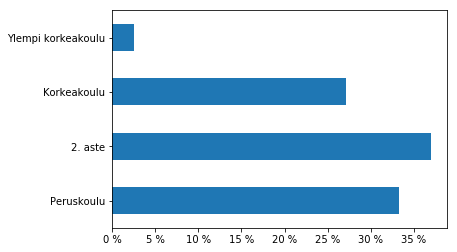

In [6]:
#Pylväskuvio, jonka pylväiden väri on käytössä olevan teeman ensimmäinen väri (C0)
#color = 'C0' määritystä ei tarvita kaikissa Pandas/Matplotlib-versioisssa
ax = df1['%'].plot.barh(color = 'C0')

#Muotoilen asteikon luvut haluamallani tavalla
ax.set_xticklabels(['{:.0f} %'.format(x) for x in ax.get_xticks()])

<h2>count() laskee monivalintojen yhteenvedot</h2>

Monivalintojen yhteenveto sujuu esimerkiksi <b>count()</b>-funktiolla. count()-funktion tulos ei ole dataframe, mutta voin muuttaa sen dataframeksi. Samalla voin järjestää monivalinnan vaihtoehdot valintojen mukaiseen järjestykseen <b>sort_values</b>-funktiolla.

Voin ryhmitellä tuloskset toisen muuttujan, esimerkiksi sukupuolen, mukaan <b>groupby()</b>-funktion avulla.

In [7]:
#Monivalintojen lukumäärät selviävät count()-funktiolla
df2=df[['työterv', 'lomaosa', 'kuntosa', 'hieroja']].count()

#Muutan series-tyyppisen listan dataframeksi ja järjestän lukumäärien mukaiseen järjestykseen
df2 = df2.to_frame('n').sort_values(by = 'n', ascending = False)

#Esitän ilman desimaaleja
df2.style.format('{:.0f}')

,n
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


Text(0.5, 0, 'Käyttäjien lukumäärä')

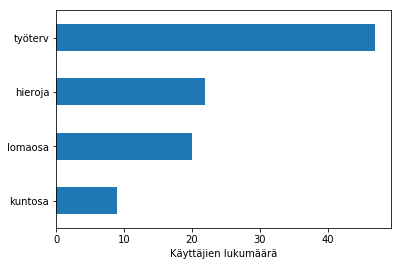

In [8]:
#Edellinen pylväinä
ax1 = df2.sort_values(by = 'n').plot.barh(color = 'C0')

ax1.legend().set_visible(False)

ax1.set_xlabel('Käyttäjien lukumäärä')

In [9]:
#Monivalinnat sukupuolen mukaan
df3 = df.groupby('sukup')['työterv', 'lomaosa', 'kuntosa', 'hieroja'].count()

#Sukupuolet sukup-listasta, joka määriteltiin aikaisemmin
df3.index = sukup

df3.style.format('{:.0f}')

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


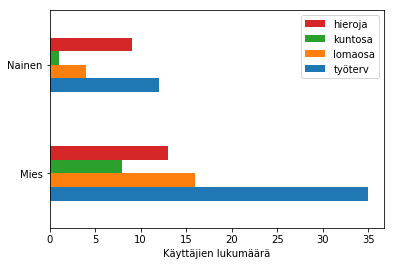

In [10]:
#Edellinen pylväinä
ax2 = df3.plot.barh()

ax2.set_xlabel('Käyttäjien lukumäärä')

#Tyylittelen selitteen värit samaan järjestykseen kuin pylväät
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels))

<h2>crosstab() laskee ristiintaulukoinnit</h2>



In [11]:
#n-arvot seuraavaan
df.groupby('sukup')['koulutus'].count()

sukup
1    62
2    19
Name: koulutus, dtype: int64

In [12]:
#Ristiintaulukoinnit crosstab-toiminnolla, prosentit sarakkeiden mukaan
df4 = pd.crosstab(df['koulutus'], df['sukup'], normalize = 'columns')

#Rivi (index) ja sarake (columns) -otsikot koulutus- ja sukup-listoista
df4.index = koulutus

df4.columns = ['Mies (n=62)', 'Nainen (n=19)']

(df4*100).style.format('{:.1f} %')

,Mies (n=62),Nainen (n=19)
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


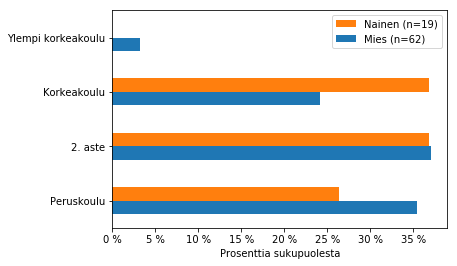

In [13]:
#Edellinen pylväinä
ax3 = df4.plot.barh()

ax3.set_xlabel('Prosenttia sukupuolesta')

ax3.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax3.get_xticks()])

#Tyylittelen selitteen värit samaan järjestykseen kuin pylväät
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(reversed(handles), reversed(labels))

[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

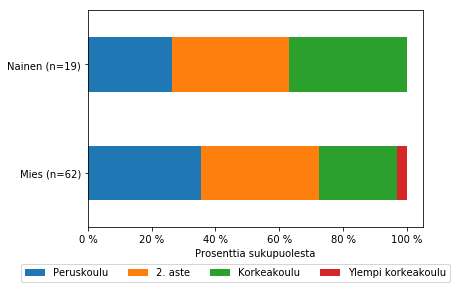

In [14]:
#Edellinen 100 % pinottuina vaakapylväinä, transpose vaihtaa arvosarjat ja kategoriat päittäin
ax4 = df4.transpose().plot.barh(stacked = True)

#plt.xlabel('Prosenttia sukupuolesta')
ax4.set_xlabel('Prosenttia sukupuolesta')

ax4.legend(loc=(-0.2, -0.25), ncol=4)
 
ax4.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax4.get_xticks()])

In [15]:
#Lasken lukumääriä value_counts()-funktiolla ja muutan tuloksen dataframeksi
df5 = df['johto'].value_counts(sort = False, normalize = True).to_frame()

#Lisään dataframeen uusia sarakkeita
df5['työtov'] = df['työtov'].value_counts(sort = False, normalize = True)
df5['työymp'] = df['työymp'].value_counts(sort = False, normalize = True)
df5['palkkat'] = df['palkkat'].value_counts(sort = False, normalize = True)
df5['työteht'] = df['työteht'].value_counts(sort = False, normalize = True)

#Riviotsikot aiemmin määritellystä tyytyväisyys-listasta
df5.index = tyytyväisyys

(df5*100).style.format('{:.1f} %')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.5 %,nan %,11.0 %,40.2 %,6.1 %
Jokseenkin tyytymätön,19.5 %,3.7 %,11.0 %,23.2 %,18.3 %
Ei tyytymätön eikä tyytyväinen,36.6 %,19.8 %,36.6 %,23.2 %,35.4 %
Jokseenkin tyytyväinen,28.0 %,43.2 %,28.0 %,12.2 %,30.5 %
Erittäin tyytyväinen,7.3 %,33.3 %,13.4 %,1.2 %,9.8 %


Seuraavassa määriteltävistä väreistä lisätietoa https://htmlcolorcodes.com/

Voit määrittää värit käyttäen värien nimiä tai hex-värikoodeja.

[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

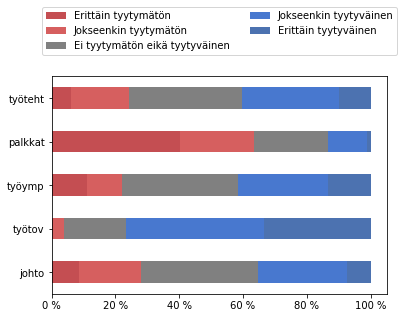

In [16]:
#Edellinen 100 % pinottuina pylväinä; värit voin itse määritellä
ax5 = df5.transpose().plot.barh(stacked = True, 
                                color=['#C44E52','#D65F5F','grey','#4878CF','#4C72B0'])

ax5.legend(loc=(-0.03, 1.1), ncol=2)

ax5.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax5.get_xticks()])

In [17]:
#Määrittelen luokkarajat palkan luokittelemiseksi
bins = [1000, 2000, 3000, 4000, 7000]

#Lisään aineistoon ikäluokka-sarakkeen
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

#Palkkaluokkiin kuuluvien lukumäärät
df6 = pd.crosstab(df['palkkaluokka'], 'n')
df6.columns.name = ''
df6

,n
palkkaluokka,
"(1000, 2000]",19
"(2000, 3000]",50
"(3000, 4000]",8
"(4000, 7000]",5


Text(0, 0.5, 'Lukumäärä')

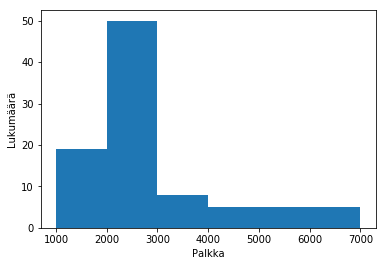

In [18]:
#Palkan luokittelu histogrammina
ax6 = df['palkka'].plot.hist(bins)

ax6.set_xlabel('Palkka')
ax6.set_ylabel('Lukumäärä')